In [48]:
import pandas_datareader.data as reader
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

In [51]:
end = dt.datetime.now()
start = dt.datetime(end.year -10, end.month, end.day)

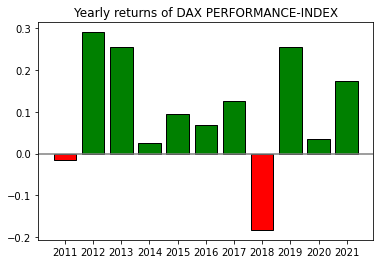

In [52]:
Asset = '^GDAXI'
name = yf.Ticker(Asset).info['shortName']

prices = reader.get_data_yahoo(Asset,start,end)['Adj Close']
returns = prices.pct_change().resample('Y').agg(lambda x: (x+1).prod() -1)
df_ret = returns.reset_index()

plt.bar(df_ret.Date.dt.year,df_ret['Adj Close'], 
        color= (df_ret['Adj Close'] >0).map({True:'green',False:'red'}),edgecolor='k')
plt.axhline(0,color='grey')
plt.title(f'Yearly returns of {name}')
plt.xticks(np.arange(min(df_ret.Date.dt.year),max(df_ret.Date.dt.year)+ 1, 1))
plt.show()